In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from pipeline import TrainingPipeline

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
model, X_test, y_test = TrainingPipeline().training_pipeline()

Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [4]:
model.score(X_test, y_test)

0.91

In [5]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.91

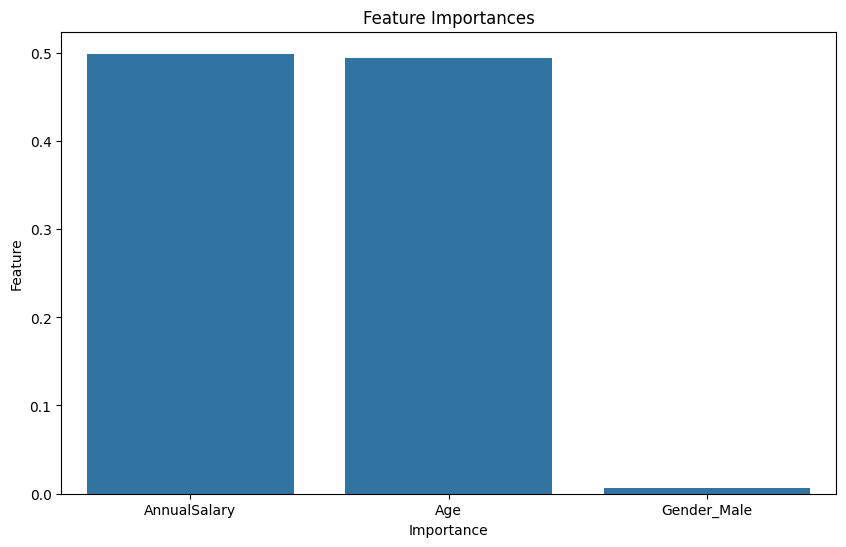

In [6]:
importances = model.feature_importances_
feature_names = X_test.columns
sorted_idx = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(y=importances[sorted_idx], x=feature_names[sorted_idx])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       112
           1       0.92      0.88      0.90        88

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



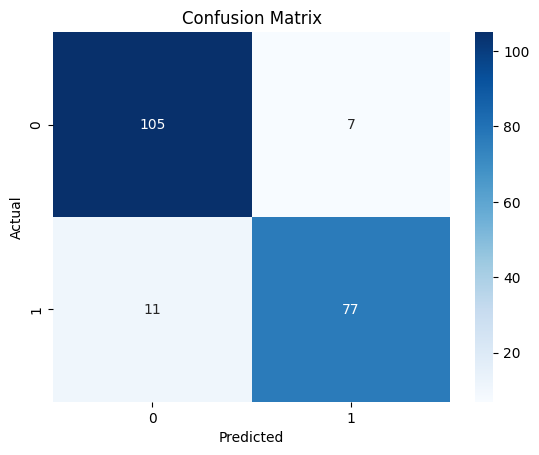

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

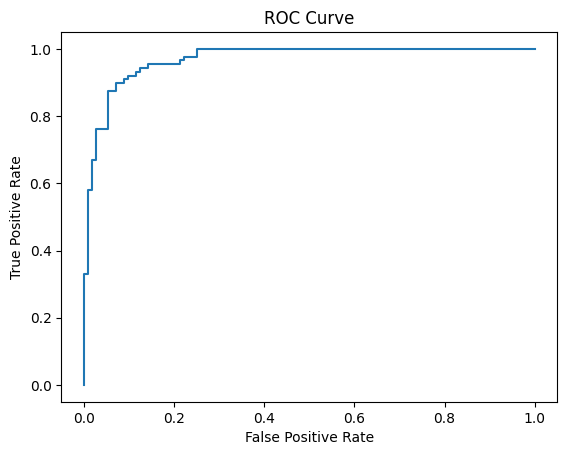

AUC: 0.968851461038961


In [9]:
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
print("AUC:", roc_auc_score(y_test, y_proba))

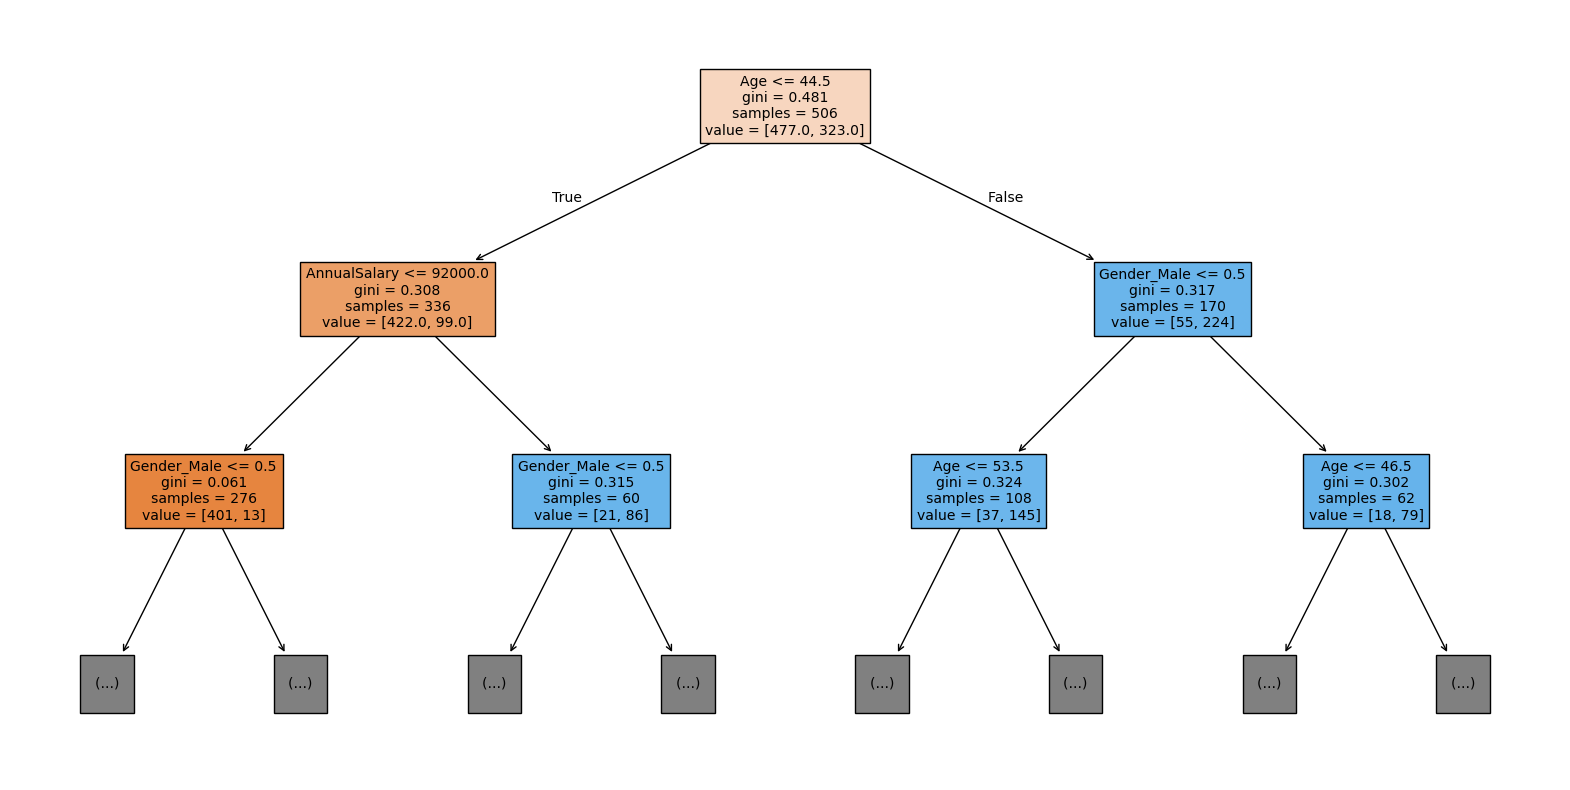

In [11]:
plt.figure(figsize=(20,10))
plot_tree(model.estimators_[0], filled=True, feature_names=X_test.columns, max_depth=2)
plt.show()

In [27]:
model.predict(X=[[40, 90000, 1]])

c:\projects\ml_learn\EToE\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])